# DecisionTree

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets  
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing 

In [34]:
# import some data to play with
fraud = pd.read_csv('Fraud_check.csv')   

In [35]:
fraud

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
5,NO,Divorced,33329,116382,0,NO
6,NO,Divorced,83357,80890,8,YES
7,YES,Single,62774,131253,3,YES
8,NO,Single,83519,102481,12,YES
9,YES,Divorced,98152,155482,4,YES


In [36]:
fraud = fraud.rename({'Undergrad':'undergrad','Marital.Status':'status','Taxable.Income':'taxableincome','City.Population':'citypopulation','Work.Experience':'workexperiance','Urban':'urban'},axis=1)
fraud

,undergrad,status,taxableincome,citypopulation,workexperiance,urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
5,NO,Divorced,33329,116382,0,NO
6,NO,Divorced,83357,80890,8,YES
7,YES,Single,62774,131253,3,YES
8,NO,Single,83519,102481,12,YES
9,YES,Divorced,98152,155482,4,YES


In [37]:
label_encoder = preprocessing.LabelEncoder()
fraud['status']= label_encoder.fit_transform(fraud['status']) 

In [47]:
label_encoder = preprocessing.LabelEncoder()
fraud['undergrad']= label_encoder.fit_transform(fraud['undergrad'])

In [48]:
x=fraud.iloc[:,0:4]
y=fraud['undergrad']

In [49]:
x

,undergrad,status,taxableincome,citypopulation
0,0,2,68833,50047
1,1,0,33700,134075
2,0,1,36925,160205
3,1,2,50190,193264
4,0,1,81002,27533
5,0,0,33329,116382
6,0,0,83357,80890
7,1,2,62774,131253
8,0,2,83519,102481
9,1,0,98152,155482


In [38]:
x=fraud.iloc[:,0:4]
y=fraud['status']

In [39]:
x 
pd.set_option("display.max_rows", None) 

In [40]:
x 

,undergrad,status,taxableincome,citypopulation
0,NO,2,68833,50047
1,YES,0,33700,134075
2,NO,1,36925,160205
3,YES,2,50190,193264
4,NO,1,81002,27533
5,NO,0,33329,116382
6,NO,0,83357,80890
7,YES,2,62774,131253
8,NO,2,83519,102481
9,YES,0,98152,155482


In [41]:
y 

0      2
1      0
2      1
3      2
4      1
5      0
6      0
7      2
8      2
9      0
10     2
11     2
12     0
13     1
14     1
15     0
16     0
17     1
18     0
19     2
20     2
21     0
22     0
23     2
24     0
25     0
26     0
27     2
28     2
29     0
30     0
31     0
32     1
33     2
34     0
35     1
36     1
37     1
38     2
39     1
40     2
41     1
42     2
43     0
44     0
45     1
46     1
47     2
48     1
49     0
50     2
51     2
52     2
53     2
54     0
55     2
56     1
57     2
58     2
59     2
60     1
61     1
62     0
63     0
64     2
65     0
66     1
67     1
68     2
69     2
70     0
71     2
72     0
73     2
74     0
75     1
76     1
77     1
78     0
79     0
80     1
81     0
82     0
83     0
84     1
85     0
86     0
87     2
88     1
89     1
90     0
91     1
92     0
93     1
94     2
95     2
96     2
97     0
98     1
99     1
100    2
101    1
102    0
103    0
104    2
105    2
106    2
107    1
108    1
109    1
110    2
1

In [42]:
fraud['taxableincome'].unique() 

array([68833, 33700, 36925, 50190, 81002, 33329, 83357, 62774, 83519,
       98152, 29732, 61063, 11794, 61830, 64070, 69869, 24987, 39476,
       97957, 10987, 88636, 14310, 78969, 92040, 38239, 31417, 55299,
       87778, 10379, 94033, 73854, 64007, 97200, 82071, 12514, 31336,
       10163, 68513, 14912, 74010, 50777, 49436, 96485, 70339, 33614,
       81079, 31532, 44034, 16264, 45706, 79616, 40137, 97703, 21917,
       81939, 19925, 34703, 78573, 10870, 65065, 94418, 26972, 91684,
       51685, 62158, 58312, 42507, 61486, 10150, 99619, 89302, 94287,
       41344, 41382, 32434, 61105, 67628, 31458, 73411, 10329, 44947,
       35610, 66564, 87348, 69098, 28449, 39277, 13747, 86652, 26741,
       77634, 99325, 85651, 15296, 10348, 41395, 22258, 79583, 22187,
       52495, 93078, 35072, 32662, 89250, 41641, 55873, 19169, 46629,
       51927, 69224, 24557, 77762, 96355, 90910, 21945, 79357, 42784,
       54638, 29944, 97318, 52022, 20391, 21016, 26679, 70682, 87326,
       15853, 75501,

In [43]:
fraud.taxableincome.value_counts() 

59689    2
68833    1
60822    1
93090    1
79373    1
17440    1
81536    1
62494    1
37580    1
96032    1
84263    1
91545    1
73313    1
54345    1
33138    1
33579    1
83094    1
90065    1
86531    1
30714    1
81378    1
26372    1
56555    1
36457    1
26101    1
36156    1
49958    1
68696    1
97453    1
68533    1
96438    1
50348    1
85016    1
73188    1
64225    1
64437    1
66330    1
51913    1
32236    1
41184    1
97980    1
15532    1
22159    1
91547    1
98738    1
21966    1
14398    1
18572    1
77312    1
42074    1
82799    1
12659    1
19649    1
50119    1
18888    1
83061    1
37857    1
38638    1
98720    1
88720    1
38626    1
64230    1
38183    1
89277    1
68269    1
58751    1
99311    1
87935    1
94528    1
72268    1
79593    1
94247    1
76700    1
12011    1
96652    1
63543    1
92007    1
27520    1
38670    1
48392    1
47425    1
73906    1
94013    1
27698    1
26793    1
67033    1
20109    1
95185    1
27684    1
98240    1
18032    1

In [44]:
colnames = list(fraud.columns)
colnames

['undergrad',
 'status',
 'taxableincome',
 'citypopulation',
 'workexperiance',
 'urban']

In [50]:
# Splitting data into training and testing data set
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=40) 

### Building Decision Tree Classifier using Entropy Criteria 

In [51]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
model.fit(x_train,y_train) 

DecisionTreeClassifier(criterion='entropy', max_depth=3)

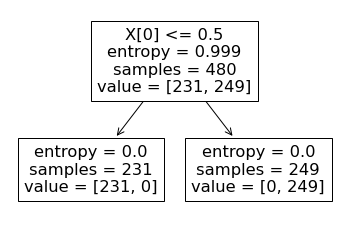

In [52]:
#PLot the decision tree
tree.plot_tree(model);


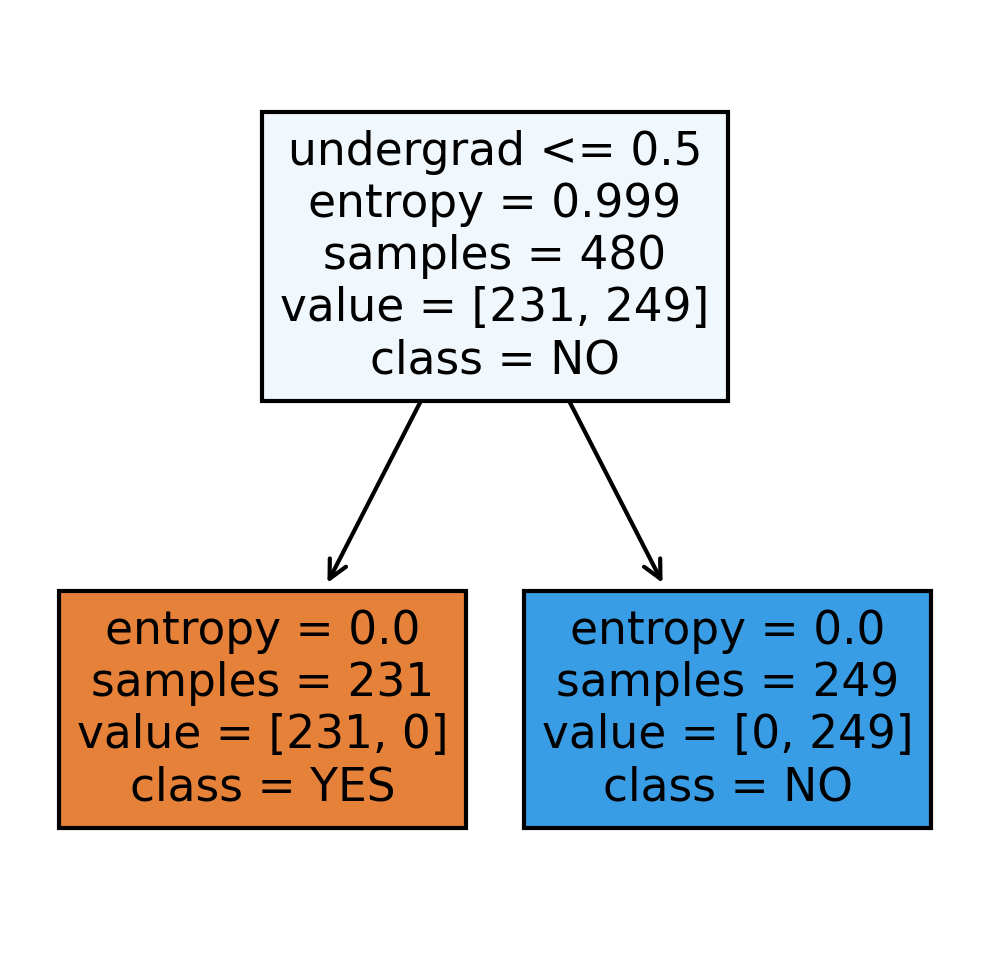

In [53]:
fn=['undergrad','status','taxableincome','citypopulation']
cn=['YES', 'NO']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True); 

In [54]:
model.feature_importances_ 

array([1., 0., 0., 0.])

In [55]:
import pandas as pd
feature_imp = pd.Series(model.feature_importances_,index=fn).sort_values(ascending=False) 
feature_imp

undergrad         1.0
status            0.0
taxableincome     0.0
citypopulation    0.0
dtype: float64

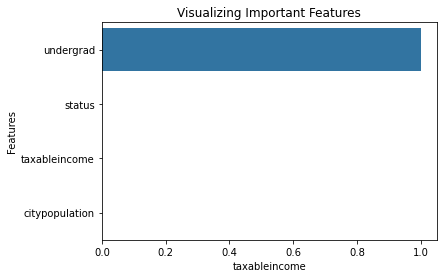

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('taxableincome')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

In [57]:
#Predicting on test data
preds = model.predict(x_test) # predicting on test data set 
pd.Series(preds).value_counts() # getting the count of each category  

1    63
0    57
dtype: int64

In [58]:

preds 

array([1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 0])

In [59]:
pd.crosstab(y_test,preds)  # getting the 2 way table to understand the correct and wrong predictions

col_0,0,1
undergrad,,
0,57,0
1,0,63


In [60]:
# Accuracy 
np.mean(preds==y_test)

1.0

### Building Decision Tree Classifier (CART) using Gini Criteria

In [61]:
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=3) 

In [62]:
model_gini.fit(x_train, y_train) 

DecisionTreeClassifier(max_depth=3)

In [63]:
#Prediction and computing the accuracy
pred=model.predict(x_test)
np.mean(preds==y_test) 

1.0

In [64]:
model.feature_importances_ 

array([1., 0., 0., 0.])

#### Decision Tree Regression Example

In [65]:
# Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor 

In [76]:
array = fraud.values
X = array[:,0:3]
y = array[:,3] 

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1) 

In [78]:
model = DecisionTreeRegressor()
model.fit(X_train, y_train) 

DecisionTreeRegressor()

In [79]:
#Find the accuracy
model.score(X_test,y_test) 

-1.230290338235958